# Basic Graph Export

In [9]:
import pandas as pd
import numpy as np
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.graph_objects as go

Vertex set:  ['A', 'B', 'C', 'D', 'E']


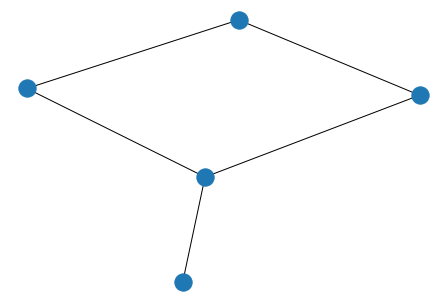

In [6]:
G = nx.Graph()

G.add_node("A")

G.add_nodes_from(["B","C","D","E"])

G.add_edge(*("A","B"))

G.add_edges_from([("A","C"), ("B","D"), ("B","E"), ("C", "E")])

print("Vertex set: ",G.nodes())

nx.draw(G)
plt.show() 

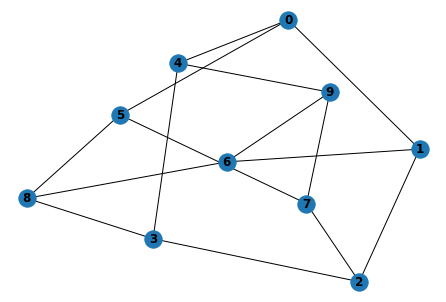

In [10]:
GP = nx.petersen_graph()

q=nx.draw(GP, with_labels=True, font_weight='bold')
nx.write_gexf(GP, "petersen_graph.gexf")
q

# Sample Dash: Filtering Graph

In [2]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import networkx as nx

# Plotly figure
def networkGraph(EGDE_VAR):

    edges = [[EGDE_VAR, 'B'], ['B', 'C'], ['B', 'D']]
    G = nx.Graph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G)

    # edges trace
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(color='black', width=1),
        hoverinfo='none',
        showlegend=False,
        mode='lines')

    # nodes trace
    node_x = []
    node_y = []
    text = []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        text.append(node)

    node_trace = go.Scatter(
        x=node_x, y=node_y, text=text,
        mode='markers+text',
        showlegend=False,
        hoverinfo='none',
        marker=dict(
            color='pink',
            size=50,
            line=dict(color='black', width=1)))

    # layout
    layout = dict(plot_bgcolor='white',
                  paper_bgcolor='white',
                  margin=dict(t=10, b=10, l=10, r=10, pad=0),
                  xaxis=dict(linecolor='black',
                             showgrid=False,
                             showticklabels=False,
                             mirror=True),
                  yaxis=dict(linecolor='black',
                             showgrid=False,
                             showticklabels=False,
                             mirror=True))

    # figure
    fig = go.Figure(data=[edge_trace, node_trace], layout=layout)

    return fig



# Dash app
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
app.title = 'Dash Networkx'

app.layout = html.Div([
        html.I('Write your EDGE_VAR'),
        html.Br(),
        dcc.Input(id='EGDE_VAR', type='text', value='Q', debounce=True),
        dcc.Graph(id='my-graph'),
    ]
)

@app.callback(
    Output('my-graph', 'figure'),
    [Input('EGDE_VAR', 'value')],
)
def update_output(EGDE_VAR):
    return networkGraph(EGDE_VAR)

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


# Sample Dash: Interactive Graph

In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import networkx as nx

# Generate random graph
nodes = 30
radius = .25
G = nx.random_geometric_graph(nodes, radius)

def networkGraph2(network_obj):
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = G.nodes[edge[0]]['pos']
        x1, y1 = G.nodes[edge[1]]['pos']
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    node_x = []
    node_y = []
    for node in G.nodes():
        x, y = G.nodes[node]['pos']
        node_x.append(x)
        node_y.append(y)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='YlGnBu',
            reversescale=True,
            color=[],
            size=10,
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            ),
            line_width=2))

    node_adjacencies = []
    node_text = []
    for node, adjacencies in enumerate(G.adjacency()):
        node_adjacencies.append(len(adjacencies[1]))
        node_text.append('# of connections: '+str(len(adjacencies[1])))

    node_trace.marker.color = node_adjacencies
    node_trace.text = node_text

    fig = go.Figure(data=[edge_trace, node_trace],
                 layout=go.Layout(
                    title='<br>Network graph made with Python',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    annotations=[ dict(
                        text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002 ) ],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )
    return fig

# Dash app
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
app.title = 'Dash Networkx'

app.layout = html.Div([
        html.I('Write your EDGE_VAR'),
        html.Br(),
        dcc.Input(id='EGDE_VAR', type='text', value='Q', debounce=True),
        dcc.Graph(id='my-graph'),
    ]
)

@app.callback(
    Output('my-graph', 'figure'),
    [Input('EGDE_VAR', 'value')],
)
def update_output(EGDE_VAR):
    return networkGraph2(G)

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)

<ipython-input-1-60e6547bd9d2>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-1-60e6547bd9d2>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


# AID MI Dash Test

In [ ]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import networkx as nx
import numpy as np
import string
import spacy
import nltk
import collections
import plotly.graph_objects as go
import re

## Imports

In [22]:
word_list = ['dose',
 'xtandi',
 'weight',
 'base',
 'community',
 'dispensing',
 'pharmacist',
 'request',
 'information',
 'extemporaneous',
 'solution',
 'enzalutamide',
 'tablet',
 'send',
 'srd',
 'vvmed28906',
 'hcp',
 'request',
 'xtandi',
 'tablet',
 'medical',
 'information',
 'letter',
 'crush',
 'dissolve',
 'filmcoated',
 'tablet',
 'hcp',
 'patient',
 'unable',
 'swallowon',
 'feed',
 'tube',
 'wonder',
 'alternative',
 'way',
 'administer',
 'xtandi',
 'capsule',
 'hcp',
 'patient',
 'unable',
 'swallowon',
 'feed',
 'tube',
 'wonder',
 'alternative',
 'way',
 'administer',
 'xtandi',
 'tablet',
 'send',
 'medinfo',
 'letter',
 'enzalutamide',
 'extemporaneous',
 'liquid',
 'preparation',
 'tablet',
 'formulation',
 '23',
 'month',
 'typical',
 'effect',
 'fatigue',
 'sleep',
 'hard',
 'mei',
 'terrible',
 'nightmare',
 'ask',
 'doctor',
 'reduce',
 'dose',
 'want',
 'reduce',
 'dose',
 'xtandi',
 'condense',
 'information',
 'patient',
 'reduce',
 'dose',
 'doctor',
 'want',
 'reduce',
 'dose',
 'want',
 'stick',
 'hcp',
 'information',
 'liquid',
 'preparation',
 'xtandi',
 'tablet',
 '40',
 'mg',
 '80',
 'mg',
 'tablet',
 'interchangeable',
 'information',
 'go',
 'xtandi',
 'capsule',
 'xtandi',
 'tablet',
 'interchangeable',
 'information',
 'open',
 'xtandi',
 'capsule',
 'extemporaneously',
 'prepare',
 'xtandi',
 'capsule',
 'hello',
 'wonder',
 'help',
 'patient',
 'trouble',
 'swallow',
 'xtandi',
 'info',
 'proofdata',
 'available',
 'tablet',
 'capsule',
 'crushedbroken',
 'xtandi',
 'capsule',
 'hello',
 'wonder',
 'help',
 'patient',
 'trouble',
 'swallow',
 'xtandi',
 'info',
 'proofdata',
 'available',
 'tablet',
 'capsule',
 'administer',
 'applesauce',
 'enteral',
 'feed',
 'tube',
 'know',
 'package',
 'insert',
 'say',
 'special',
 'case',
 'do not',
 'know',
 'evidence',
 'report',
 'thank',
 'help',
 'quick',
 'question',
 'new',
 'tablet',
 'pharmacist',
 'ask',
 'capsule',
 'tablet',
 'interchangeable',
 'specifically',
 'patient',
 'issue',
 'swallow',
 'switch',
 'capsule',
 'tablet',
 'need',
 'new',
 'rx',
 'hcp',
 'receive',
 'rx',
 'say',
 'xtandi',
 '40 mg',
 'do not',
 'specify',
 'capsule',
 'vs',
 'tablet',
 'ship',
 'hcp',
 'need',
 'clarify',
 'xtandi',
 'tablet',
 'hello',
 'wonder',
 'help',
 'patient',
 'trouble',
 'swallow',
 'xtandi',
 'info',
 'proofdata',
 'available',
 'tablet',
 'capsule',
 'crushedbroken',
 'xtandi',
 'tablet',
 'hello',
 'wonder',
 'help',
 'patient',
 'trouble',
 'swallow',
 'xtandi',
 'info',
 'proofdata',
 'available',
 'tablet',
 'capsule',
 'administer',
 'applesauce',
 'enteral',
 'feed',
 'tube',
 'know',
 'package',
 'insert',
 'say',
 'special',
 'case',
 'do not',
 'know',
 'evidence',
 'report',
 'thank',
 'help',
 'information',
 'restart',
 'father',
 'xtandi',
 'reduce',
 'dose',
 'xtandi',
 'tablet',
 'liquify',
 'involve',
 'stop',
 'xtandido',
 'need',
 'taper',
 'xtandi',
 'note',
 'patient',
 'hcp',
 'tell',
 'stop',
 'xtandi',
 'withdrawal',
 'effect',
 'stop',
 'xtandiare',
 'effect',
 'stop',
 'xtandi',
 'information',
 'take',
 'reduce',
 'dose',
 'xtandido',
 'patient',
 'stop',
 'andor',
 'drop',
 'reduce',
 'dose',
 'read',
 'response',
 'stop',
 'old',
 'antiandrogen',
 'psa',
 'drop',
 'temporarily',
 'stop',
 'somthing',
 'happen',
 'xtandi',
 'basic',
 'daily',
 'dose',
 '160',
 'mg',
 'reason',
 '80',
 'mg',
 'tablet',
 '40',
 'mg',
 'tablet',
 'provider',
 'know',
 'new',
 'tablet',
 'formulation',
 'crush',
 'patient',
 'unable',
 'swallow',
 'pill',
 'provider',
 'say',
 'apalutamide',
 'crush',
 'hope',
 'true',
 'enzalutamide',
 'husband',
 'take',
 'xtandi',
 '102019',
 'friday',
 'glitch',
 'mediation',
 'wednesday',
 '24mar2021',
 'miss',
 'day',
 'information',
 'xtandi',
 'capsule',
 'open',
 'hcp',
 'request',
 'information',
 'extemporaneous',
 'solution',
 'enzalutamide',
 'tablet',
 'hcp',
 'information',
 'open',
 'capsule',
 'easy',
 'swallow',
 'doctor',
 'write',
 'xtandi',
 'capsule',
 'tablet',
 'dispense',
 'tablet',
 'send',
 'write',
 'information',
 'xtandi',
 'interchangeable',
 'understand',
 'xtandi',
 'pill',
 'pretty',
 'large',
 'trouble',
 'swallow',
 'large',
 'pill',
 'cut',
 'half',
 'understand',
 'xtandi',
 'pill',
 'pretty',
 'large',
 'trouble',
 'swallow',
 'large',
 'pill',
 'cut',
 'half',
 'optimum',
 'time',
 'day',
 'xtandi',
 'time',
 'change',
 'occur',
 'stick',
 'take',
 'xtandi',
 'time',
 'hour',
 'later',
 'dr',
 'bracken',
 'information',
 'liquify',
 'new',
 'xtandi',
 'tablet',
 'patient',
 'trouble',
 'swallow',
 'thank',
 'xtandi',
 'discontinue',
 'right',
 'away',
 'xtandi',
 'capsule',
 'open',
 'xtandi',
 'tablet',
 'liquify',
 'new',
 'xtandi',
 'tablet',
 'formulation',
 'crush',
 'xtandi',
 'capsule',
 'open',
 'liquid',
 'feed',
 'tube',
 'father',
 'followup',
 'mi29164',
 'doctor',
 'office',
 'request',
 'follow',
 'srd',
 'email',
 'nurse',
 'extemporaneous',
 'preparation',
 'enzalutamide',
 'capsule',
 'vvmed29399',
 'xtandi',
 'tablet',
 'liquify',
 'followup',
 'mi29164',
 'doctor',
 'office',
 'request',
 'follow',
 'srd',
 'email',
 'nurse',
 'extemporaneous',
 'liquid',
 'prep',
 'xtandi',
 'tablet',
 'vvmed28906',
 'xtandi',
 'capsule',
 'liquid',
 'father',
 'feed',
 'tube',
 'dr',
 'know',
 'study',
 'long',
 'week',
 'vacation',
 'weene',
 'hcp',
 'request',
 'xtandi',
 'tablet',
 'medical',
 'information',
 'letter',
 'crush',
 'dissolve',
 'filmcoated',
 'tablet',
 'pharmacist',
 'request',
 'follow',
 'srd',
 'email',
 'extemporaneous',
 'preparation',
 'enzalutamide',
 'capsule',
 'pharmacist',
 'request',
 'follow',
 'srd',
 'email',
 'extemporaneous',
 'liquid',
 'prep',
 'xtandi',
 'tablet',
 'xtandi',
 'tablet',
 'administer',
 'feed',
 'tube',
 'recommend',
 'dose',
 'xtandi',
 'data',
 'preparingpreparations',
 'xtandi',
 'capsule',
 'administer',
 'patient',
 'ng',
 'tube',
 'swallow',
 'xtandi',
 'brother',
 'stop',
 'xtandi',
 'particular',
 'time',
 'note',
 'brother',
 'locate',
 'ecuador',
 'unite',
 'state',
 'specific',
 'time',
 'xtandi',
 'stop',
 'note',
 'caller',
 'refer',
 'duration',
 'treatment',
 'unite',
 'state',
 'xtandi',
 'take',
 'low',
 'dose',
 'need',
 'conserve',
 'expensive',
 'medication',
 'hcp',
 'request',
 'information',
 'extemporaneous',
 'solution',
 'enzalutamide',
 'capsule',
 'nurse',
 'say',
 'pill',
 'making',
 'swell',
 'take',
 'patient',
 'struggle',
 'swallow',
 'xtandi',
 'capsule',
 'suggestion',
 'information',
 'open',
 'xtandi',
 'patient',
 'difficultly',
 'swallow',
 'capsule',
 'tablet',
 'formulation',
 'question',
 'crush',
 'new',
 'tablet',
 'long',
 'person',
 'stay',
 'xtandi',
 'hcp',
 'information',
 'liquid',
 'preparation',
 'xtandi',
 'capsule',
 'information',
 'administration',
 'enzalutamide',
 'capsule',
 'peg',
 'tube',
 'possible',
 'dissolve',
 'capsule',
 'information',
 'administration',
 'enzalutamide',
 'tablet',
 'peg',
 'tube',
 'possible',
 'crush',
 'tablet']

# Turn all questions into a list
def data_prep_text(df, stop_words):
    a_series = df['question']
    # Merge each question in the series into a single larger string
    big_str = a_series.str.cat(sep=' ')
    # Substitute various forms of 'covid' with 'covid'
    big_str = re.sub('covid19|covid-19|coronavirus|corona-virus|sars-cov-2|sarscov2|sars cov 2', 'covid', big_str)
    # Remove punctuation
    punc_removed = big_str.translate(str.maketrans('', '', string.punctuation))
    # Split 'punc_removed' into a list of words
    word_list = punc_removed.split()
    # Remove stop words
    word_list = [word for word in word_list if word not in stop_words]
    # Remove any remaining single character words
    word_list = [word for word in word_list if len(word) > 1]
    # Lemmatize 'word_list'
    nlp = spacy.load('en_core_web_trf')
    lemmatizer = nlp.get_pipe('lemmatizer')
    lemmatized_word_list = []
    for x in word_list:
        doc = nlp(x)
        lemmatized_term = ' '.join([token.lemma_ for token in doc])
        lemmatized_word_list.append(lemmatized_term)

    return lemmatized_word_list


# Bigram count
def bigram_count(word_list):
    # Identify bigrams
    bgs = list(nltk.bigrams(word_list))
    # Identify bigrams counts
    b_counts = collections.Counter(bgs)
    # Transform 'b_counts' into a dataframe. Pass a number to 'most_common()' to get less than all bigrams
    b_df = pd.DataFrame(b_counts.most_common(), columns=['bigram', 'count'])
    # Transform 'b_df' into a list containing a dictionary
    b_dict = b_df.set_index('bigram').T.to_dict('records')
    
    return b_dict

# Create graph network edges
def make_edge(x, y, text, width):
    '''Creates a scatter trace for the edge between x's and y's with given width

    Parameters
    ----------
    x    : a tuple of the endpoints' x-coordinates in the form, tuple([x0, x1, None])
    y    : a tuple of the endpoints' y-coordinates in the form, tuple([y0, y1, None])
    width: the width of the line

    Returns
    -------
    An edge trace that goes between x0 and x1 with specified width.
    '''
    return  go.Scatter(x         = x,
                       y         = y,
                       line      = dict(width = width,
                                   color = 'cornflowerblue'),
                       hoverinfo = 'text',
                       text      = ([text]),
                       mode      = 'lines')

## Create b_dict

In [3]:
# Import data
df_raw_clean = pd.read_csv('AID-MI data/raw_data_clean.csv')
df_stop_words = pd.read_csv('AID-MI data/custom_stop_words.csv')


# Create stop words, country, med product, classification & 'classes_gt' lists
stop_words = list(df_stop_words['Stop_Words'])
country_list = list(set(list(df_raw_clean['case_country'])))
country_list.sort()
med_prod_list = list(set(list(df_raw_clean['med_product'])))
med_prod_list.sort()
classifications = list(set(list(df_raw_clean['classification'])))
classifications.sort()
classes_gt = classifications + ['Grand Total']
country_prod_list = [(c, p) for c in country_list for p in med_prod_list]

# Create one chart
country = country_prod_list[11862][0]
product = country_prod_list[11862][1]
product = 'xtandi'
classes_gt1=['Dosage and Administration']
print(country, product)

# Read
try:
#         df_WER_1 = read_sc(today + '_' + country + '_' + product + '_' + 'WER_1_' + month_type + '_triggers.csv')
    df_WER_1 = pd.read_csv('AID-MI data/2022-11-08_US_xtandi_WER_1_all_months_triggers.csv')
except:
    df_WER_1 = pd.DataFrame()

try:
#         df_WER_4 = read_sc(today + '_' + country + '_' + product + '_' + 'WER_4_' + month_type + '_triggers.csv')
    df_WER_4 = pd.read_csv('AID-MI data/2022-11-08_US_xtandi_WER_4_all_months_triggers.csv')
except:
    df_WER_4 = pd.DataFrame()

if len(df_WER_1) != 0 or len(df_WER_4) != 0:
    for term in classes_gt1:

        # WER 1
        temp_df = pd.DataFrame(df_WER_1[term])
        temp_df = temp_df.dropna()
        if len(temp_df) != 0:
            dates_list = list(temp_df[term])
            for date in dates_list:

                # Filter data
                if term == 'Grand Total':
                    df_subset = df_raw_clean[(df_raw_clean['creation_date'] == date) & (df_raw_clean['case_country'] == country) & (df_raw_clean['med_product'] == product)]
                else:
                    df_subset = df_raw_clean[(df_raw_clean['creation_date'] == date) & (df_raw_clean['classification'] == term) & (df_raw_clean['case_country'] == country) & (df_raw_clean['med_product'] == product)]
    
                # Lemmatized word list
                # word_list = data_prep_text(df_subset, stop_words)
        
                # Compute bigram counts
                b_dict = bigram_count(word_list)

NameError: name 'pd' is not defined

## Create network

In [47]:
b_dict=b_dict
layout_format='spring'
min_bigram_count = 2
edge_weight_factor = 1.75


# Initialize the graph
G = nx.Graph()

# Count the times a word appears in bigrams that occur more than once
k_long_list = list()
for k, v in b_dict[0].items():
    if v >= min_bigram_count:
        for x in range(0, v):
            k_long_list.append(k[0])
            k_long_list.append(k[1])
k_count = dict(collections.Counter(k_long_list))

# Add nodes
for k, v in k_count.items():
    if v >= 20:
        G.add_node(k, size = 20)
    else:
        G.add_node(k, size = v)

# Create connections between nodes
for k, v in b_dict[0].items():
    if v >= min_bigram_count:
        G.add_edge(k[0], k[1], weight = (v))

# create list for G subgraph (nodes with 2 or less neighbors)
G_sub = []
# loop through all nodes in G
for i in range(0, G.number_of_nodes()):
    # if the number of descendants(number of nodes that can be reached via edges) is <= 2
    if len(nx.descendants(G,list(G)[i])) <= 2:
        # append node to G subgraph list
        G_sub.append(list(G)[i])

# Create G_plot list to store G and G_sub
G_plot = []
# Create subgraph
G_sub_plot = nx.Graph(G.subgraph(G_sub))
# Remove subgraph from original G
G.remove_nodes_from(list(G_sub))
# Append original G to list
G_plot.append(G)
# Append subgraph to list
G_plot.append(G_sub_plot)

# Initialize list for figures
fig_list = []
# Loop through all G in G_plot
for G in G_plot:

    # Get positions for the nodes in G. 'k' sets the distance between nodes & ranges from 0 - 1.
    if layout_format == 'spring':
        pos = nx.spring_layout(G, k = 1, scale = 100)
    elif layout_format == 'circular':
        pos = nx.circular_layout(G, scale=100, center=None, dim=2)  

    # For each edge, make an edge_trace, append to list
    edge_trace = []
    for edge in G.edges():
        if G.edges()[edge]['weight'] > 0:
            word_1 = edge[0]
            word_2 = edge[1]
            x0, y0 = pos[word_1]
            x1, y1 = pos[word_2]
            text   = word_1 + '--' + word_2 + ': ' + str(G.edges()[edge]['weight'])
            trace  = make_edge([x0, x1, None], [y0, y1, None], text,
                               0.6*G.edges()[edge]['weight']**edge_weight_factor)
            edge_trace.append(trace)

    # Make a node trace
    node_trace = go.Scatter(x         = [],
                            y         = [],
                            text      = [],
                            textposition = "top center",
                            textfont_size = 30,
                            mode      = 'markers+text',
                            hoverinfo = 'none',
                            marker    = dict(color = [],
                                             size  = [],
                                             line  = None))

    # For each node in 'G', get the position and size and add to the node_trace
    for node in G.nodes():
        x, y = pos[node]
        node_trace['x'] += tuple([x])
        node_trace['y'] += tuple([y])
        node_trace['marker']['color'] += tuple(['cornflowerblue'])
        node_trace['marker']['size'] += tuple([5*G.nodes()[node]['size']])
        node_trace['text'] += tuple(['<b>' + node + '</b>'])

    # layout = go.Layout(
    #     paper_bgcolor='rgba(0,0,0,0)',
    #     plot_bgcolor='rgba(0,0,0,0)'
    # )
    
    layout=go.Layout(
    title='<br>Network graph made with Python',
    titlefont_size=16,
    showlegend=False,
    hovermode='closest',
    margin=dict(b=20,l=5,r=5,t=40),
    annotations=[ dict(
        text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
        showarrow=False,
        xref="paper", yref="paper",
        x=0.005, y=-0.002 ) ],
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

    fig = go.Figure(data=[edge_trace, node_trace], layout = layout)
    # for trace in edge_trace:
    #     fig.add_trace(trace)
    # fig.add_trace(node_trace)
    # fig.update_layout(showlegend = False, autosize = False, width = 3000, height = 1500)
    # fig.update_xaxes(showticklabels = False)
    # fig.update_yaxes(showticklabels = False)
    # # Append figure to list
    # fig_list.append(fig)


ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [[Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 68.59792100087299},
    'mode': 'lines',
    'text': [xtandi--tablet: 15],
    'x': [1.223665884785458, -13.996200916758275, None],
    'y': [11.613392321050577, 4.580856427377591, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 53.401335327779755},
    'mode': 'lines',
    'text': [xtandi--capsule: 13],
    'x': [1.223665884785458, -21.344823204466387, None],
    'y': [11.613392321050577, 13.85064692272487, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 13.801171051719486},
    'mode': 'lines',
    'text': [xtandi--swallow: 6],
    'x': [1.223665884785458, 28.911194309917136, None],
    'y': [11.613392321050577, -0.6403094547004325, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 6.788225099390856},
    'mode': 'lines',
    'text': [xtandi--dose: 4],
    'x': [1.223665884785458, -35.315223319360875, None],
    'y': [11.613392321050577, 42.26187528079211, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 6.788225099390856},
    'mode': 'lines',
    'text': [xtandi--info: 4],
    'x': [1.223665884785458, -27.60883179900707, None],
    'y': [11.613392321050577, -57.612891922266606, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 4.103112702518599},
    'mode': 'lines',
    'text': [xtandi--open: 3],
    'x': [1.223665884785458, 38.27797667788458, None],
    'y': [11.613392321050577, 31.825111476926686, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 4.103112702518599},
    'mode': 'lines',
    'text': [xtandi--stop: 3],
    'x': [1.223665884785458, 24.42931253233198, None],
    'y': [11.613392321050577, -53.89836664006798, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [xtandi--request: 2],
    'x': [1.223665884785458, 4.470330825581611, None],
    'y': [11.613392321050577, 45.977050559894764, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [xtandi--administer: 2],
    'x': [1.223665884785458, -50.962624554577246, None],
    'y': [11.613392321050577, -28.04555136108336, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [xtandi--preparation: 2],
    'x': [1.223665884785458, 42.10517191083442, None],
    'y': [11.613392321050577, -32.06164276994618, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [xtandi--crushedbroken: 2],
    'x': [1.223665884785458, -30.6019958891093, None],
    'y': [11.613392321050577, 90.96950479091792, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [xtandi--take: 2],
    'x': [1.223665884785458, 44.41348955291311, None],
    'y': [11.613392321050577, 88.27878947009489, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [xtandi--information: 2],
    'x': [1.223665884785458, 15.475692757614524, None],
    'y': [11.613392321050577, 13.355680344180065, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [xtandi--understand: 2],
    'x': [1.223665884785458, -45.68747898985226, None],
    'y': [11.613392321050577, 86.16473778695553, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [xtandi--pill: 2],
    'x': [1.223665884785458, 21.115778879704884, None],
    'y': [11.613392321050577, 29.582605361724855, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [xtandi--time: 2],
    'x': [1.223665884785458, 76.58221147515738, None],
    'y': [11.613392321050577, -56.80785690110415, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [xtandi--new: 2],
    'x': [1.223665884785458, -13.128809159195816, None],
    'y': [11.613392321050577, -37.99287722858812, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [xtandi--prep: 2],
    'x': [1.223665884785458, 38.59900857208826, None],
    'y': [11.613392321050577, 81.87452587710729, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 6.788225099390856},
    'mode': 'lines',
    'text': [tablet--formulation: 4],
    'x': [-13.996200916758275, 33.94818612788905, None],
    'y': [4.580856427377591, -57.07824747932513, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 6.788225099390856},
    'mode': 'lines',
    'text': [tablet--available: 4],
    'x': [-13.996200916758275, -56.22336751163016, None],
    'y': [4.580856427377591, -58.63698197992161, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 6.788225099390856},
    'mode': 'lines',
    'text': [tablet--capsule: 4],
    'x': [-13.996200916758275, -21.344823204466387, None],
    'y': [4.580856427377591, 13.85064692272487, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 4.103112702518599},
    'mode': 'lines',
    'text': [tablet--enzalutamide: 3],
    'x': [-13.996200916758275, -4.697529182138786, None],
    'y': [4.580856427377591, -50.10710559429716, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 4.103112702518599},
    'mode': 'lines',
    'text': [tablet--send: 3],
    'x': [-13.996200916758275, 79.01055444307636, None],
    'y': [4.580856427377591, 9.204221721027977, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 4.103112702518599},
    'mode': 'lines',
    'text': [tablet--mg: 3],
    'x': [-13.996200916758275, -76.13372362518994, None],
    'y': [4.580856427377591, 39.85096600150716, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 4.103112702518599},
    'mode': 'lines',
    'text': [tablet--interchangeable: 3],
    'x': [-13.996200916758275, -1.835728111861706, None],
    'y': [4.580856427377591, 78.21381817633787, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 4.103112702518599},
    'mode': 'lines',
    'text': [tablet--new: 3],
    'x': [-13.996200916758275, -13.128809159195816, None],
    'y': [4.580856427377591, -37.99287722858812, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 4.103112702518599},
    'mode': 'lines',
    'text': [tablet--liquify: 3],
    'x': [-13.996200916758275, -73.04205269320458, None],
    'y': [4.580856427377591, -7.373488918829066, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [tablet--medical: 2],
    'x': [-13.996200916758275, -30.8019103647685, None],
    'y': [4.580856427377591, 57.62954941023635, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [tablet--filmcoated: 2],
    'x': [-13.996200916758275, 25.037899751417996, None],
    'y': [4.580856427377591, 11.099972947984806, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [tablet--hcp: 2],
    'x': [-13.996200916758275, 11.79129438852693, None],
    'y': [4.580856427377591, 73.1933050434715, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [tablet--40: 2],
    'x': [-13.996200916758275, -60.98987621562224, None],
    'y': [4.580856427377591, 54.33912581880364, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [tablet--pharmacist: 2],
    'x': [-13.996200916758275, 46.65632747593768, None],
    'y': [4.580856427377591, 2.679396616202376, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [tablet--hello: 2],
    'x': [-13.996200916758275, -78.56981606596, None],
    'y': [4.580856427377591, 43.87071286060514, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 6.788225099390856},
    'mode': 'lines',
    'text': [capsule--enzalutamide: 4],
    'x': [-21.344823204466387, -4.697529182138786, None],
    'y': [13.85064692272487, -50.10710559429716, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 4.103112702518599},
    'mode': 'lines',
    'text': [capsule--administer: 3],
    'x': [-21.344823204466387, -50.962624554577246, None],
    'y': [13.85064692272487, -28.04555136108336, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 4.103112702518599},
    'mode': 'lines',
    'text': [capsule--open: 3],
    'x': [-21.344823204466387, 38.27797667788458, None],
    'y': [13.85064692272487, 31.825111476926686, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [capsule--hello: 2],
    'x': [-21.344823204466387, -78.56981606596, None],
    'y': [13.85064692272487, 43.87071286060514, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [capsule--crushedbroken: 2],
    'x': [-21.344823204466387, -30.6019958891093, None],
    'y': [13.85064692272487, 90.96950479091792, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [capsule--information: 2],
    'x': [-21.344823204466387, 15.475692757614524, None],
    'y': [13.85064692272487, 13.355680344180065, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 18.074771696767172},
    'mode': 'lines',
    'text': [feed--tube: 7],
    'x': [-27.877263907922536, 1.6119929050471797, None],
    'y': [-8.407181532511121, 0.1678172910548163, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [feed--swallowon: 2],
    'x': [-27.877263907922536, 15.448102181218815, None],
    'y': [-8.407181532511121, 63.856149961460176, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [feed--enteral: 2],
    'x': [-27.877263907922536, -23.020725322561173, None],
    'y': [-8.407181532511121, -86.16162083993218, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [tube--wonder: 2],
    'x': [1.6119929050471797, -84.24431550443593, None],
    'y': [0.1678172910548163, 0.1537561441951942, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [tube--know: 2],
    'x': [1.6119929050471797, -42.74959323085171, None],
    'y': [0.1678172910548163, -71.44336345720527, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [tube--peg: 2],
    'x': [1.6119929050471797, 78.00158048733614, None],
    'y': [0.1678172910548163, 65.64887251922342, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [tube--possible: 2],
    'x': [1.6119929050471797, 92.8436895653504, None],
    'y': [0.1678172910548163, 24.535591090039752, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 18.074771696767172},
    'mode': 'lines',
    'text': [reduce--dose: 7],
    'x': [-53.499352064106795, -35.315223319360875, None],
    'y': [31.875676994834826, 42.26187528079211, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [reduce--want: 2],
    'x': [-53.499352064106795, -20.34474669671093, None],
    'y': [31.875676994834826, 90.17131582315302, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [dose--want: 2],
    'x': [-35.315223319360875, -20.34474669671093, None],
    'y': [42.26187528079211, 90.17131582315302, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 18.074771696767172},
    'mode': 'lines',
    'text': [trouble--swallow: 7],
    'x': [28.30439512898348, 28.911194309917136, None],
    'y': [39.64632850602081, -0.6403094547004325, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 10.03110457464633},
    'mode': 'lines',
    'text': [trouble--patient: 5],
    'x': [28.30439512898348, -12.414735273992436, None],
    'y': [39.64632850602081, 56.95943941616429, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [trouble--large: 2],
    'x': [28.30439512898348, -1.7331001949672522, None],
    'y': [39.64632850602081, 25.386756582688864, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [swallow--large: 2],
    'x': [28.911194309917136, -1.7331001949672522, None],
    'y': [-0.6403094547004325, 25.386756582688864, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 6.788225099390856},
    'mode': 'lines',
    'text': [patient--help: 4],
    'x': [-12.414735273992436, -46.04365196005189, None],
    'y': [56.95943941616429, 50.1220196560323, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 4.103112702518599},
    'mode': 'lines',
    'text': [patient--unable: 3],
    'x': [-12.414735273992436, -53.619928829774906, None],
    'y': [56.95943941616429, 86.24494760683582, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [patient--hcp: 2],
    'x': [-12.414735273992436, 11.79129438852693, None],
    'y': [56.95943941616429, 73.1933050434715, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 6.788225099390856},
    'mode': 'lines',
    'text': [hcp--request: 4],
    'x': [11.79129438852693, 4.470330825581611, None],
    'y': [73.1933050434715, 45.977050559894764, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 4.103112702518599},
    'mode': 'lines',
    'text': [hcp--information: 3],
    'x': [11.79129438852693, 15.475692757614524, None],
    'y': [73.1933050434715, 13.355680344180065, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 6.788225099390856},
    'mode': 'lines',
    'text': [request--follow: 4],
    'x': [4.470330825581611, -8.529398234509957, None],
    'y': [45.977050559894764, 58.612872617909176, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 4.103112702518599},
    'mode': 'lines',
    'text': [request--pharmacist: 3],
    'x': [4.470330825581611, 46.65632747593768, None],
    'y': [45.977050559894764, 2.679396616202376, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 4.103112702518599},
    'mode': 'lines',
    'text': [request--information: 3],
    'x': [4.470330825581611, 15.475692757614524, None],
    'y': [45.977050559894764, 13.355680344180065, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [request--office: 2],
    'x': [4.470330825581611, -63.67889391773042, None],
    'y': [45.977050559894764, 27.36636855404665, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [formulation--crush: 2],
    'x': [33.94818612788905, 23.796578144788313, None],
    'y': [-57.07824747932513, -31.488296711909438, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 6.788225099390856},
    'mode': 'lines',
    'text': [hello--wonder: 4],
    'x': [-78.56981606596, -84.24431550443593, None],
    'y': [43.87071286060514, 0.1537561441951942, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 6.788225099390856},
    'mode': 'lines',
    'text': [wonder--help: 4],
    'x': [-84.24431550443593, -46.04365196005189, None],
    'y': [0.1537561441951942, 50.1220196560323, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [wonder--alternative: 2],
    'x': [-84.24431550443593, -92.20533608364619, None],
    'y': [0.1537561441951942, -2.2868513366260403, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [help--thank: 2],
    'x': [-46.04365196005189, 51.70329782633527, None],
    'y': [50.1220196560323, 60.130257458230595, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 6.788225099390856},
    'mode': 'lines',
    'text': [info--proofdata: 4],
    'x': [-27.60883179900707, -29.479292229574316, None],
    'y': [-57.612891922266606, -96.30821904520083, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 6.788225099390856},
    'mode': 'lines',
    'text': [proofdata--available: 4],
    'x': [-29.479292229574316, -56.22336751163016, None],
    'y': [-96.30821904520083, -58.63698197992161, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 6.788225099390856},
    'mode': 'lines',
    'text': [follow--srd: 4],
    'x': [-8.529398234509957, 3.559110304465204, None],
    'y': [58.612872617909176, -20.96910363847001, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 6.788225099390856},
    'mode': 'lines',
    'text': [srd--email: 4],
    'x': [3.559110304465204, -0.24564779727097588, None],
    'y': [-20.96910363847001, -89.81702114648301, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [email--nurse: 2],
    'x': [-0.24564779727097588, -49.20274589944483, None],
    'y': [-89.81702114648301, -83.94561519029213, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [email--extemporaneous: 2],
    'x': [-0.24564779727097588, 15.580091166821273, None],
    'y': [-89.81702114648301, -48.71267385342293, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 4.103112702518599},
    'mode': 'lines',
    'text': [enzalutamide--solution: 3],
    'x': [-4.697529182138786, 22.174658833857343, None],
    'y': [-50.10710559429716, -93.24475770263746, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [enzalutamide--preparation: 2],
    'x': [-4.697529182138786, 42.10517191083442, None],
    'y': [-50.10710559429716, -32.06164276994618, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [enzalutamide--administration: 2],
    'x': [-4.697529182138786, -30.720017083937744, None],
    'y': [-50.10710559429716, -78.13849097366453, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 4.103112702518599},
    'mode': 'lines',
    'text': [information--extemporaneous: 3],
    'x': [15.475692757614524, 15.580091166821273, None],
    'y': [13.355680344180065, -48.71267385342293, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 4.103112702518599},
    'mode': 'lines',
    'text': [information--open: 3],
    'x': [15.475692757614524, 38.27797667788458, None],
    'y': [13.355680344180065, 31.825111476926686, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [information--medical: 2],
    'x': [15.475692757614524, -30.8019103647685, None],
    'y': [13.355680344180065, 57.62954941023635, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [information--letter: 2],
    'x': [15.475692757614524, 92.55339505308197, None],
    'y': [13.355680344180065, -6.557412456178434, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [information--liquid: 2],
    'x': [15.475692757614524, 59.48769521576577, None],
    'y': [13.355680344180065, 4.660550255012526, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [information--interchangeable: 2],
    'x': [15.475692757614524, -1.835728111861706, None],
    'y': [13.355680344180065, 78.21381817633787, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [information--administration: 2],
    'x': [15.475692757614524, -30.720017083937744, None],
    'y': [13.355680344180065, -78.13849097366453, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 4.103112702518599},
    'mode': 'lines',
    'text': [extemporaneous--solution: 3],
    'x': [15.580091166821273, 22.174658833857343, None],
    'y': [-48.71267385342293, -93.24475770263746, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 4.103112702518599},
    'mode': 'lines',
    'text': [extemporaneous--liquid: 3],
    'x': [15.580091166821273, 59.48769521576577, None],
    'y': [-48.71267385342293, 4.660550255012526, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [extemporaneous--nurse: 2],
    'x': [15.580091166821273, -49.20274589944483, None],
    'y': [-48.71267385342293, -83.94561519029213, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [extemporaneous--preparation: 2],
    'x': [15.580091166821273, 42.10517191083442, None],
    'y': [-48.71267385342293, -32.06164276994618, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [unable--swallowon: 2],
    'x': [-53.619928829774906, 15.448102181218815, None],
    'y': [86.24494760683582, 63.856149961460176, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 4.103112702518599},
    'mode': 'lines',
    'text': [liquid--preparation: 3],
    'x': [59.48769521576577, 42.10517191083442, None],
    'y': [4.660550255012526, -32.06164276994618, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [liquid--prep: 2],
    'x': [59.48769521576577, 38.59900857208826, None],
    'y': [4.660550255012526, 81.87452587710729, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [mg--40: 2],
    'x': [-76.13372362518994, -60.98987621562224, None],
    'y': [39.85096600150716, 54.33912581880364, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [mg--80: 2],
    'x': [-76.13372362518994, -39.10727519095775, None],
    'y': [39.85096600150716, 76.26543412106007, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [administer--way: 2],
    'x': [-50.962624554577246, -41.53529362913807, None],
    'y': [-28.04555136108336, -44.45017642676206, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [administer--applesauce: 2],
    'x': [-50.962624554577246, -13.827626903397197, None],
    'y': [-28.04555136108336, -100.00000000000001, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [new--liquify: 2],
    'x': [-13.128809159195816, -73.04205269320458, None],
    'y': [-37.99287722858812, -7.373488918829066, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [stop--effect: 2],
    'x': [24.42931253233198, -68.99005635930216, None],
    'y': [-53.89836664006798, -61.33524949936236, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [letter--crush: 2],
    'x': [92.55339505308197, 23.796578144788313, None],
    'y': [-6.557412456178434, -31.488296711909438, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [crush--dissolve: 2],
    'x': [23.796578144788313, -49.64444198743174, None],
    'y': [-31.488296711909438, 11.056994284666406, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [dissolve--filmcoated: 2],
    'x': [-49.64444198743174, 25.037899751417996, None],
    'y': [11.056994284666406, 11.099972947984806, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [alternative--way: 2],
    'x': [-92.20533608364619, -41.53529362913807, None],
    'y': [-2.2868513366260403, -44.45017642676206, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [applesauce--enteral: 2],
    'x': [-13.827626903397197, -23.020725322561173, None],
    'y': [-100.00000000000001, -86.16162083993218, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [know--package: 2],
    'x': [-42.74959323085171, -85.45572383215566, None],
    'y': [-71.44336345720527, -48.365585020578806, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [know--do not: 2],
    'x': [-42.74959323085171, 26.64762441521534, None],
    'y': [-71.44336345720527, -75.01653194090677, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [know--evidence: 2],
    'x': [-42.74959323085171, -12.422959236931543, None],
    'y': [-71.44336345720527, -48.8020581166432, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [package--insert: 2],
    'x': [-85.45572383215566, 9.062300232846797, None],
    'y': [-48.365585020578806, -8.509723212940736, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [insert--say: 2],
    'x': [9.062300232846797, 72.33864212231845, None],
    'y': [-8.509723212940736, -67.4139116629822, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [say--special: 2],
    'x': [72.33864212231845, 71.48713360497743, None],
    'y': [-67.4139116629822, -11.587437846278931, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [special--case: 2],
    'x': [71.48713360497743, 18.663483276628234, None],
    'y': [-11.587437846278931, -79.39114036925199, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [case--do not: 2],
    'x': [18.663483276628234, 26.64762441521534, None],
    'y': [-79.39114036925199, -75.01653194090677, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [evidence--report: 2],
    'x': [-12.422959236931543, 75.52676313396212, None],
    'y': [-48.8020581166432, -24.71959862758423, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [report--thank: 2],
    'x': [75.52676313396212, 51.70329782633527, None],
    'y': [-24.71959862758423, 60.130257458230595, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [pill--pretty: 2],
    'x': [21.115778879704884, 68.88560277410645, None],
    'y': [29.582605361724855, 54.815854774952065, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [pill--large: 2],
    'x': [21.115778879704884, -1.7331001949672522, None],
    'y': [29.582605361724855, 25.386756582688864, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [pill--cut: 2],
    'x': [21.115778879704884, -32.12145948358262, None],
    'y': [29.582605361724855, -31.82307892679228, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [pretty--large: 2],
    'x': [68.88560277410645, -1.7331001949672522, None],
    'y': [54.815854774952065, 25.386756582688864, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [cut--half: 2],
    'x': [-32.12145948358262, 46.07738826168532, None],
    'y': [-31.82307892679228, -55.27269200542768, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [followup--mi29164: 2],
    'x': [74.54534708172622, 92.02307622094875, None],
    'y': [39.136793365945145, -12.18550037531752, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [mi29164--doctor: 2],
    'x': [92.02307622094875, 31.28352895396212, None],
    'y': [-12.18550037531752, 49.37896992604183, None]
}), Scatter({
    'hoverinfo': 'text',
    'line': {'color': 'cornflowerblue', 'width': 2.0181513966089146},
    'mode': 'lines',
    'text': [doctor--office: 2],
    'x': [31.28352895396212, -63.67889391773042, None],
    'y': [49.37896992604183, 27.36636855404665, None]
})]]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth', 'choroplethmapbox',
                     'cone', 'contour', 'contourcarpet',
                     'densitymapbox', 'funnel', 'funnelarea',
                     'heatmap', 'heatmapgl', 'histogram',
                     'histogram2d', 'histogram2dcontour', 'icicle',
                     'image', 'indicator', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scattersmith',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

In [ ]:
b_dict

import numpy as np
import matplotlib.pyplot as plt

G = nx.Graph()


for i in range(0,len(b_dict[0].keys())):
    start=list(b_dict[0].keys())[i][0]
    end=list(b_dict[0].keys())[i][1]
    weight=list(b_dict[0].values())[i]
    G.add_edge(start, end, weight=weight)

# # Show the shortest path between points 'a' and 'e'.
# path = nx.shortest_path(G, source='a',target='e')
# print(path)

# path_edges = zip(path, path[1:])
# path_edges = set(path_edges)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color='lawngreen', with_labels = True)
# nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='mediumseagreen')
# nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=10)
# plt.axis('equal')
# plt.show()   

networkGraph2(G)

KeyError: 'pos'

In [79]:
len(b_dict[0].keys())

391

## App

In [ ]:
# Dash app
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
app.title = 'Dash Networkx'

app.layout = html.Div([
        html.I('Write your EDGE_VAR'),
        html.Br(),
        dcc.Input(id='EGDE_VAR', type='text', value='Q', debounce=True),
        dcc.Graph(id='my-graph'),
    ]
)

@app.callback(
    Output('my-graph', 'figure'),
    [Input('EGDE_VAR', 'value')],
)
def update_output(EGDE_VAR):
    return fig_list[0]

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


# Dash Cytoscape

In [ ]:
from dash import Dash, html
import dash_cytoscape as cyto

app = Dash(__name__)

app.layout = html.Div([
    html.P("Dash Cytoscape:"),
    cyto.Cytoscape(
        id='cytoscape',
        elements=[
            {'data': {'id': 'ca', 'label': 'Canada'}}, 
            {'data': {'id': 'on', 'label': 'Ontario'}}, 
            {'data': {'id': 'qc', 'label': 'Quebec'}},
            {'data': {'source': 'ca', 'target': 'on'}}, 
            {'data': {'source': 'ca', 'target': 'qc'}}
        ],
        layout={'name': 'breadthfirst'},
        style={'width': '400px', 'height': '500px'}
    )
])


app.run_server(debug=True)